In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns("Measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find the most recent date in the data set.
# Find the biggest item in the Date column in Measurement
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

Query Date:  2016-08-23


Text(0, 0.5, 'Inches')

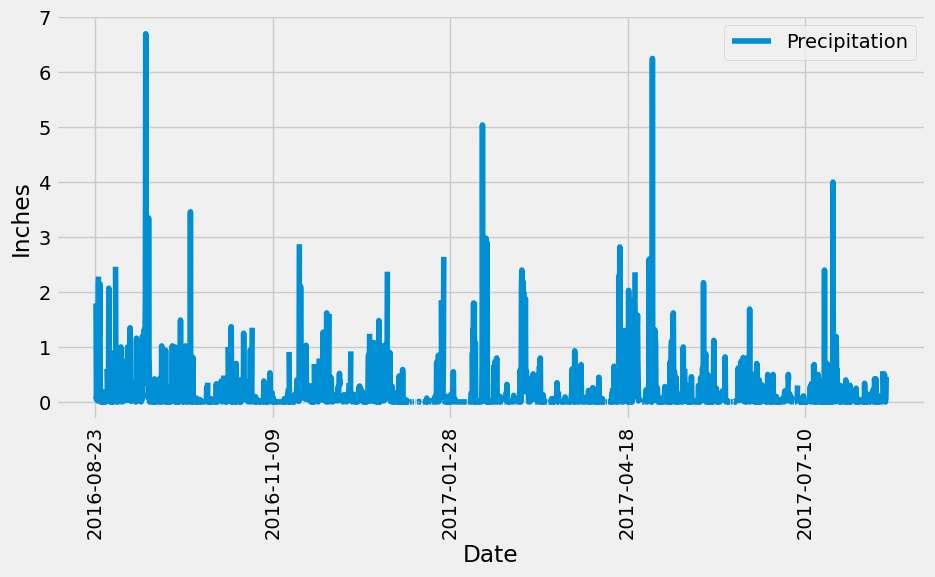

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
prcp_all=session.query(Measurement.date, Measurement.prcp).\
       filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_all_df = pd.DataFrame(prcp_all, columns=['Date','Precipitation'])

# Sort the dataframe by date
prcp_all_df =prcp_all_df.sort_values(by=['Date']) 

# Use Pandas Plotting with Matplotlib to plot the data
prcp_all_df.plot(x='Date',y='Precipitation', rot=90, figsize=(10,5),x_compat=True)
plt.ylabel('Inches')

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_all_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# Perform a query to retrieve the station cloumn
stat_all=session.query(Measurement.station).all()

# List the stations and their counts in descending order.
counts = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
print(f"lowest temperature:{lowest_temp}, highest temperature:{highest_temp}, average temperature: {avg_temp}")

lowest temperature:(54.0,), highest temperature:(85.0,), average temperature: (71.66378066378067,)


Text(0.5, 0, 'Temperature')

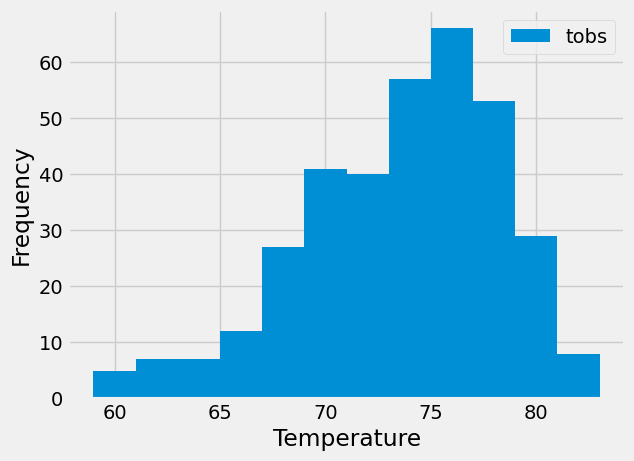

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= query_date).all()
# Save the query results as a Pandas DataFrame.
year_temp_df = pd.DataFrame(year_temp)
year_temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()